# <u>Dorset & Wilts 2 North</u>

**Sam Jones - @SJBiomech**

In this notebook I will be looking at the Dorset & Wilts 2 North league table from the past years. I will aim to briefly investigate the data and determine the factors which appear have the greatest influence on league position.

Data were taken from Melksham's website since they appear to have stayed in this league each year. <br>Data access: https://www.melkshamrfc.co.uk/teams/22086/league-table?season=67487

In [29]:
# Plots displayed in the notebook and also stored in the notebook document.
%matplotlib inline

In [30]:
from pandas import *
from matplotlib import pyplot as plt
import numpy as np

## Load in and Clean Data

First load in the collated league data:

In [31]:
league = read_excel('League Results.xlsx')

Have a look at the first few rows:

In [32]:
league.head()

,Pos,Team,Season,Pl,HW,HD,HL,AW,AD,AL,...,HF,AF,F,A,Diff,TB,LB,Adj,Rand,Pts
0,1,Westbury,19/20,15,5,0,0,9,0,1,...,171,343,514,174,340,0.0,0.0,0.0,NaN,56
1,2,Swindon II,19/20,18,8,0,1,4,0,5,...,283,157,440,247,193,0.0,0.0,0.0,NaN,50
2,3,Corsham II,19/20,17,7,0,2,5,0,3,...,341,301,642,302,340,0.0,0.0,0.0,NaN,48
3,4,Devizes II,19/20,17,7,0,2,3,1,4,...,339,181,520,295,225,0.0,0.0,0.0,NaN,43
4,5,Pewsey Vale,19/20,17,8,0,1,1,0,7,...,359,127,486,288,198,0.0,0.0,0.0,NaN,36


There are a few columns we do not need and so first we will drop them and inspect the first few rows of our new data frame. Since I put this dataset together myself, I also know that there are no missing values and so no further cleaning is necessary.

In [33]:
league.drop(columns = ['TB', 'LB', 'Adj', 'Rand']).head()

,Pos,Team,Season,Pl,HW,HD,HL,AW,AD,AL,W,D,L,HF,AF,F,A,Diff,Pts
0,1,Westbury,19/20,15,5,0,0,9,0,1,14,0,1,171,343,514,174,340,56
1,2,Swindon II,19/20,18,8,0,1,4,0,5,12,0,6,283,157,440,247,193,50
2,3,Corsham II,19/20,17,7,0,2,5,0,3,12,0,5,341,301,642,302,340,48
3,4,Devizes II,19/20,17,7,0,2,3,1,4,10,1,6,339,181,520,295,225,43
4,5,Pewsey Vale,19/20,17,8,0,1,1,0,7,9,0,8,359,127,486,288,198,36


## Calculate Relative Variables

Even from these first few rows we can see that the teams have not all played an equal amount of matches. Therefore, it may be a good idea to calculate variables per game. This way we can make fair, direct comparisons and even scale up to a full 22 matches if deemed necessary or of interest.

First, calculate the variables of interest per game (i.e. divide variable by no. of matches played):

In [34]:
league['Rel F']    = league['F']    / league['Pl']
league['Rel A']    = league['A']    / league['Pl']
league['Rel Diff'] = league['Diff'] / league['Pl']
league['Rel Pts']  = league['Pts']  / league['Pl']

Check new columns by inspection:

In [35]:
league.head()

,Pos,Team,Season,Pl,HW,HD,HL,AW,AD,AL,...,Diff,TB,LB,Adj,Rand,Pts,Rel F,Rel A,Rel Diff,Rel Pts
0,1,Westbury,19/20,15,5,0,0,9,0,1,...,340,0.0,0.0,0.0,NaN,56,34.266667,11.600000,22.666667,3.733333
1,2,Swindon II,19/20,18,8,0,1,4,0,5,...,193,0.0,0.0,0.0,NaN,50,24.444444,13.722222,10.722222,2.777778
2,3,Corsham II,19/20,17,7,0,2,5,0,3,...,340,0.0,0.0,0.0,NaN,48,37.764706,17.764706,20.000000,2.823529
3,4,Devizes II,19/20,17,7,0,2,3,1,4,...,225,0.0,0.0,0.0,NaN,43,30.588235,17.352941,13.235294,2.529412
4,5,Pewsey Vale,19/20,17,8,0,1,1,0,7,...,198,0.0,0.0,0.0,NaN,36,28.588235,16.941176,11.647059,2.117647


## Perform Linear Regression Analyses to Model the Relationship Between Variables of Interest

In this section we will do as the title suggests and perfrom simple linear regression analyses. This will help us to identify which variables are most important to finish higher in the league table.

First import the Statsmodel module to perform the analyses:

In [36]:
import statsmodels.api as sm

### Simple Linear Regression

The first linear regression will look at the influence of each teams' average points difference per match against their finishing position in the league.

Let's start by plotting these variables against each other.

Text(0, 0.5, 'Final League Position')

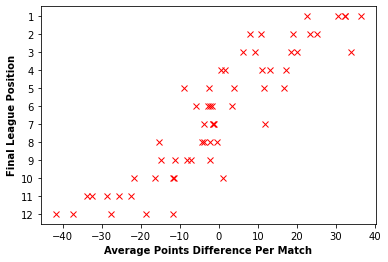

In [37]:
plt.plot(league['Rel Diff'], league['Pos'], 'rx') # A look at how average points difference per match influences final league position
plt.gca().invert_yaxis()
plt.yticks(np.arange(min(league['Pos']), max(league['Pos'])+1, 1.0))
plt.xlabel("Average Points Difference Per Match", fontweight='bold')
plt.ylabel("Final League Position", fontweight='bold')

As we can see, there appears to be a linear relationship of some degree where a greater average points difference per match leads to finishing higher up the table.

Now run the linear regression between these variables.

A simple linear regression like this one will have the structure:

**$Y = C + M*X$**

Where:

- $Y$ = Dependent variable (output/outcome/prediction/estimation)
- $C$ = Constant (Y-Intercept)
- $M$ = Slope of the regression line (the effect that X has on Y)
- $X$ = Independent variable (input variable used in the prediction of Y)

In [38]:
X = league['Rel Diff'] # Model input variable
Y = league['Pos'] # Model output variable

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit() # Fit using ordinary least squares
predictions = model.predict(X) 

model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                    Pos   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     256.2
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           6.03e-23
Time:                        15:09:23   Log-Likelihood:                -108.78
No. Observations:                  60   AIC:                             221.6
Df Residuals:                      58   BIC:                             225.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4385      0.195     33.056      0.0

This gives the linear equation:

$Y = 6.4385 + (-0.1699 * X)$

Where:

- $Y$ = League Position
- $X$ = Points Difference

Let's visualise this in a graph:

Text(-40, 3, '$R^2$ = 0.815')

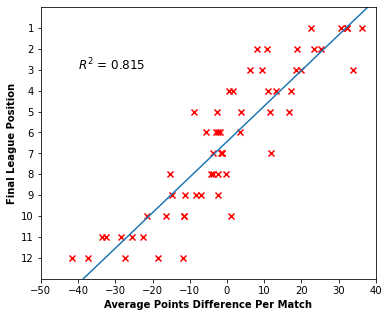

In [39]:
fig = sm.graphics.abline_plot(model_results=model) # Plot regression line
fig.set_size_inches(6, 5)
ax = fig.axes[0]
ax.scatter(league['Rel Diff'], league['Pos'], c='r', marker='x') # Scatter plot
ax.invert_yaxis()
plt.xlabel("Average Points Difference Per Match", fontweight='bold')
plt.ylabel("Final League Position", fontweight='bold')
plt.xlim(-50, 40)    
plt.ylim(13, 0)
plt.yticks(np.arange(min(league['Pos']), max(league['Pos'])+1, 1.0))
plt.text(-40,3, '$R^2$ = {:.3f}'.format(model.rsquared), fontsize=12) # Add R-squared to graph with 3 decimal places

Based on the results the linear regression equation appears to fit the data well. It can be said that the model explains $81.5$% of the variation in the dependent variable (final league position), which is interpreted from the R-squared value ($R^2 = 0.815$). The independent variable (average points difference per match) is also a significant ($p < 0.001$) predictor of final league position in this model.

### Multiple Linear Regression

Now let's run run a multiple linear regression and look at the influence of average points scored and average points conceded per match against final league position.

A multiple linear regression like this one will have the structure:

**$Y = C + B_1*X_1 + B_2*X_2$**

Where:

- $Y$ = Dependent variable (output/outcome/prediction/estimation)
- $C$ = Constant (Y-Intercept)
- $B_n$ = Independent variable coefficients (the effect that X has on Y)
- $X_n$ = Independent variables (input variable used in the prediction of Y)

In [40]:
X2 = league[['Rel F', 'Rel A']] # Model input variable
Y2 = league['Pos'] # Model output variable

X2 = sm.add_constant(X2) # adding a constant

model2 = sm.OLS(Y2, X2).fit() # Fit using ordinary least squares
predictions = model2.predict(X2) 

model2_summary = model2.summary()
print(model2_summary)

                            OLS Regression Results                            
Dep. Variable:                    Pos   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     131.9
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           4.11e-22
Time:                        15:09:24   Log-Likelihood:                -107.64
No. Observations:                  60   AIC:                             221.3
Df Residuals:                      57   BIC:                             227.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4040      1.380      3.191      0.0

This gives the linear equation:

$Y = 4.4040 + (-0.1236 * X_1) + (0.2116 * X_2)$

Where:

- $Y$ = League Position
- $X_1$ = Points Scored
- $X_2$ = Points Conceded

Again, let's visualise this. It's not as simple to plot a multiple regression so we will just plot two scatter plots - one for each of the independent variables. Unfortunately this does mean that we can't plot the regression equation on the figures.

Text(0, 0.5, 'Final League Position')

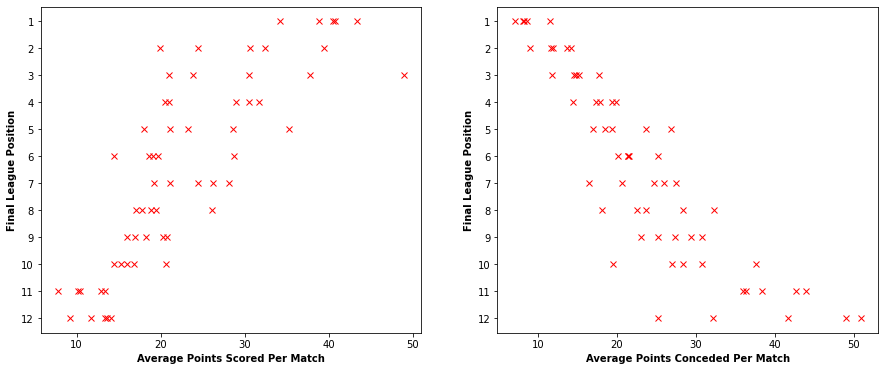

In [41]:
fig = plt.figure()
fig.set_size_inches(15, 6)

plt.subplot(1, 2, 1)
plt.plot(league['Rel F'], league['Pos'], 'rx')
plt.gca().invert_yaxis()
plt.yticks(np.arange(min(league['Pos']), max(league['Pos'])+1, 1.0))
plt.xlabel("Average Points Scored Per Match", fontweight='bold')
plt.ylabel("Final League Position", fontweight='bold')

plt.subplot(1, 2, 2)
plt.plot(league['Rel A'], league['Pos'], 'rx')
plt.gca().invert_yaxis()
plt.yticks(np.arange(min(league['Pos']), max(league['Pos'])+1, 1.0))
plt.xlabel("Average Points Conceded Per Match", fontweight='bold')
plt.ylabel("Final League Position", fontweight='bold')


The results of this multiple linear regression indicate that splitting points difference into points scored and points conceded explains slightly more of the variation ($82.2$%; $R^2 = 0.822$) in the final league position than using points difference alone ($81.5$%; $R^2 = 0.815$). Both of the independent variables are also significant ($p < 0.001$) predictors of final league position, with the average number of points conceded per match having a greater influence than points scored. This can be observed from the coefficient values (Points scored coeff. = $-0.1236$; Points conceded coeff. =  $0.2116$) and also from the figures above - where, based on visual inspection, there appears to be a slightly stronger correlation between points conceded and final league position than points scored and final league position.

### Summary

This brief piece of analysis looks at the table from one of my local leagues over the past few seasons. It demonstrates how a team's final position in the league can be modelled using linear regression and variables such as points scored and conceded per match, and also overall points difference per match. 

Obviously there are many points of interest that could be singled out for discussion. One I find interesting is how points conceded is weighted nearly twice as much as points scored (in the multiple linear regression), indicating that good defence would be more important than attack in achieveing a higher league position. Another that stood out to me was the constants given by the models. The simple linear regression using just points difference resulted in a constant of 6.4385. This suggests that if a single team achieved a points difference of zero in every match (i.e. draw every match) then they would finish 6th in the league (6.4385 rounded to the nearest integer). Whereas, using the multiple linear regression, and separating points difference into two separate independent variables of points scored and points conceded, resulted in a constant of 4.4040. This value suggests that if a team draws every match then they will finish 4th in the league. Though the latter would reqiure the team not to score or concede, i.e. a score of 0-0, and other factors such as bonus points are not considered.

Whilst there are clearly more influenicing factors at play that have not been accounted for and collecting more seasons worth of data would improve the accuracy of the models, the aim of this work was simply to practise performing linear regression analyses in Python. $\square$